### Preparations
_Set-up Environment_

In [1]:
# Ensure API Wrapper is available and load it
! ls ScrumSaga

Account.py   Portfolio.py  __pycache__	Repo.py
__init__.py  Project.py    README.md


In [2]:
import sys
path = '/home/jovyan/work/notebooks/ScrumSaga'
sys.path.append(path)
import ScrumSaga as saga

In [3]:
saga.Account._Account__URL = 'http://144.76.39.53:3001/v1'

In [4]:
# Acocunt information (must be manipulated on website: scrumsaga.com)
SAGA_ACCT = {"email":"dev.team@mgmt-tech.org","password":"******************"}

Acct = saga.Account(acct_email=SAGA_ACCT['email'], acct_password=SAGA_ACCT['password'])
Acct.login()

passwords match


_Check Available Repo Data_

In [5]:
Acct.view_data()
Acct.view_diagram()

['IMTorgTestCode--testprj_Java_aSimple']
['IMTorg--testprj_Java_aSimple_400da3_"Thu Mar 02 2017 17:01:59 GMT+0000 (UTC)"', 'IMTorgTestCode--testprj_Java_aSimple_ac7454_"Sat Mar 04 2017 15:42:39 GMT+0000 (UTC)"', 'IMTorgTestCode--testprj_Java_aSimple_ac7454_"Sat Mar 04 2017 15:47:29 GMT+0000 (UTC)"']


### Simple Java Project

In [6]:
# create project
JavaRepo = saga.Repo('IMTorgTestCode','information@mgmt-tech.org','testprj_Java_aSimple')
JSimple = saga.Project(Acct, JavaRepo)

_Load Data from Repo_ 

In [7]:
# load all metric groups
JSimple.load_all()

COMPLEXITY group records:  14
 -elapsed time: 0.018756
ERROR group records:  0
 -elapsed time: 0.007676
ENTITY_STRUCTURE group records:  10
 -elapsed time: 0.011541
QUALITY group records:  0
 -elapsed time: 0.007597
RELATION group records:  8
 -elapsed time: 0.007691
AUTHOR group records:  6
 -elapsed time: 0.008075
SIZE group records:  14
 -elapsed time: 0.008332
ENTITY_CHARACTERISTIC group records:  25
 -elapsed time: 0.379007
PROJECT group records:  27
 -elapsed time: 0.011322
PROCESS_LOG group records:  0
 -elapsed time: 0.008313
TAG group records:  10
 -elapsed time: 0.008624
Loading completed with no errors


In [8]:
import rpy2
%load_ext rpy2.ipython

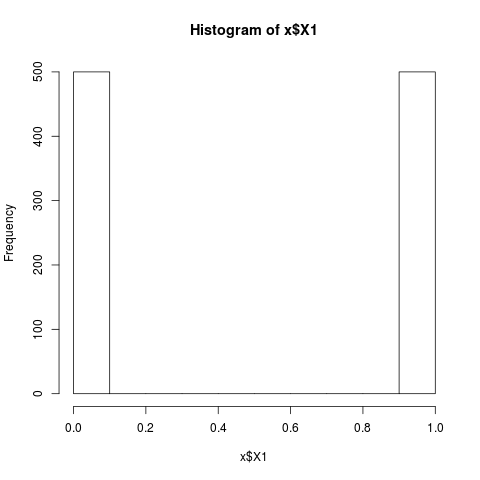

In [11]:
%%R
x = data.frame(replicate(10,sample(0:1,1000,rep=TRUE)))
hist(x$X1)

In [12]:
size = JSimple['size']

In [13]:
size.columns

Index(['count', 'files_count', 'files_size', 'hash', 'id', 'loc_add',
       'loc_del', 'loc_total', 'modified_file_count', 'original_file_count',
       'prj_id', 'project', 'stamp', 'tag_count'],
      dtype='object')

In [16]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import pandas.rpy.common as com

In [17]:
rdf = com.convert_to_r_dataframe(size)
robjects.globalenv['rdf'] = rdf

In [49]:
stats = importr('stats')
base = importr('base')

In [53]:
base.summary(rdf)

R object with classes: ('table',) mapped to:
<Matrix - Python:0x7ff9bae7cfc8 / R:0x77ec230>
['Min...., '1st ..., 'Medi..., ..., 'Mean..., '3rd ..., 'Max....]

In [51]:
robjects.r('summary(rdf)')

array(['Min.   : 1.00  ', '1st Qu.: 4.25  ', 'Median : 7.50  ',
       'Mean   : 7.50  ', '3rd Qu.:10.75  ', 'Max.   :14.00  ',
       'Min.   : 42.0  ', '1st Qu.:106.5  ', 'Median :145.5  ',
       'Mean   :126.1  ', '3rd Qu.:154.0  ', 'Max.   :154.0  ',
       'Min.   :30576278  ', '1st Qu.:53283501  ', 'Median :53319580  ',
       'Mean   :51000277  ', '3rd Qu.:53328691  ', 'Max.   :53328715  ',
       'Length:14         ', 'Class :AsIs       ', 'Mode  :character  ',
       'NA', 'NA', 'NA', 'Min.   : 1.00  ', '1st Qu.: 4.25  ',
       'Median : 7.50  ', 'Mean   : 7.50  ', '3rd Qu.:10.75  ',
       'Max.   :14.00  ', 'Min.   : 7976  ', '1st Qu.:12682  ',
       'Median :18449  ', 'Mean   :16611  ', '3rd Qu.:21054  ',
       'Max.   :21063  ', 'Min.   :    0  ', '1st Qu.: 3488  ',
       'Median : 8680  ', 'Mean   : 7218  ', '3rd Qu.:11102  ',
       'Max.   :11105  ', 'Min.   :7976  ', '1st Qu.:9194  ',
       'Median :9768  ', 'Mean   :9394  ', '3rd Qu.:9951  ',
       'Max.   :995

In [18]:
%R summary(rdf)


array(['Min.   : 1.00  ', '1st Qu.: 4.25  ', 'Median : 7.50  ',
       'Mean   : 7.50  ', '3rd Qu.:10.75  ', 'Max.   :14.00  ',
       'Min.   : 42.0  ', '1st Qu.:106.5  ', 'Median :145.5  ',
       'Mean   :126.1  ', '3rd Qu.:154.0  ', 'Max.   :154.0  ',
       'Min.   :30576278  ', '1st Qu.:53283501  ', 'Median :53319580  ',
       'Mean   :51000277  ', '3rd Qu.:53328691  ', 'Max.   :53328715  ',
       'Length:14         ', 'Class :AsIs       ', 'Mode  :character  ',
       'NA', 'NA', 'NA', 'Min.   : 1.00  ', '1st Qu.: 4.25  ',
       'Median : 7.50  ', 'Mean   : 7.50  ', '3rd Qu.:10.75  ',
       'Max.   :14.00  ', 'Min.   : 7976  ', '1st Qu.:12682  ',
       'Median :18449  ', 'Mean   :16611  ', '3rd Qu.:21054  ',
       'Max.   :21063  ', 'Min.   :    0  ', '1st Qu.: 3488  ',
       'Median : 8680  ', 'Mean   : 7218  ', '3rd Qu.:11102  ',
       'Max.   :11105  ', 'Min.   :7976  ', '1st Qu.:9194  ',
       'Median :9768  ', 'Mean   :9394  ', '3rd Qu.:9951  ',
       'Max.   :995

In [19]:
import pandas
size['timestamp'] = pandas.to_datetime(size.stamp)
rdf = com.convert_to_r_dataframe(size)
robjects.globalenv['rdf'] = rdf

In [20]:
size.timestamp

0    2015-12-10 13:58:11
1    2015-12-10 14:43:48
2    2015-12-10 14:46:29
3    2015-12-10 14:51:57
4    2015-12-10 14:52:40
5    2015-12-10 15:33:23
6    2015-12-10 16:15:33
7    2015-12-10 16:24:03
8    2015-12-10 16:30:12
9    2016-02-15 13:52:37
10   2016-02-15 09:38:41
11   2016-04-18 16:12:52
12   2016-06-12 17:21:07
13   2016-06-12 06:31:02
Name: timestamp, dtype: datetime64[ns]

In [21]:
%R rdf$timestamp

array([  1.44975589e+09,   1.44975863e+09,   1.44975879e+09,
         1.44975912e+09,   1.44975916e+09,   1.44976160e+09,
         1.44976413e+09,   1.44976464e+09,   1.44976501e+09,
         1.45554436e+09,   1.45552912e+09,   1.46099597e+09,
         1.46575207e+09,   1.46571306e+09])

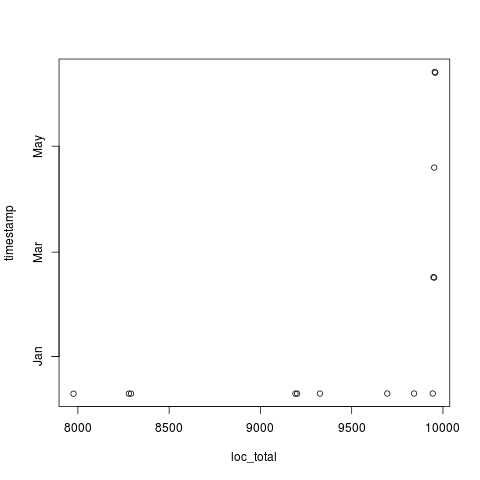

In [111]:
%R plot(timestamp~loc_total, rdf)